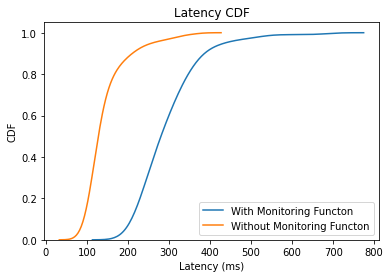

In [2]:
import csv
from matplotlib import pyplot as plt
import random

import seaborn as sns

mon_latency = []
with open("data/data-with-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        mon_latency.append(float(row[0]))

no_latency = []
with open("data/data-no-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        no_latency.append(float(row[0]))

# Draw CDF
# plt.hist(latency, 100, histtype='step', cumulative=True)

sns.kdeplot(data = mon_latency, cumulative = True, label = 'With Monitoring Functon')
sns.kdeplot(data = no_latency, cumulative = True, label = 'Without Monitoring Functon')


# Label axes
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.legend()
plt.title('Latency CDF')

# Show plot
plt.savefig('graphs/one-chain.pdf')

150.36249999999998
348.06249999999994
496.9375
656.6875
719.075


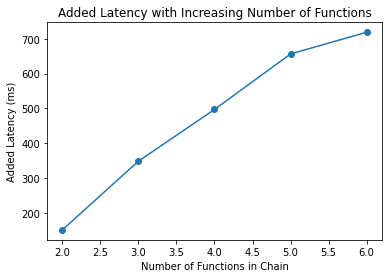

In [3]:
import numpy as np

data_1_with_monitor = []
data_1_no_monitor = []
data_2_with_monitor = []
data_2_no_monitor = []
data_3_with_monitor = []
data_3_no_monitor = []
data_4_with_monitor = []
data_4_no_monitor = []
data_5_with_monitor = []
data_5_no_monitor = []

with open("data/data-with-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_1_with_monitor.append(float(row[0]))

with open("data/data-no-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_1_no_monitor.append(float(row[0]))

with open("data/data-2-with-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_2_with_monitor.append(float(row[0]))

with open("data/data-2-no-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_2_no_monitor.append(float(row[0]))

with open("data/data-3-with-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_3_with_monitor.append(float(row[0]))
    
with open("data/data-3-no-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_3_no_monitor.append(float(row[0]))

with open("data/data-4-with-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_4_with_monitor.append(float(row[0]))

with open("data/data-4-no-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_4_no_monitor.append(float(row[0]))

with open("data/data-5-with-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_5_with_monitor.append(float(row[0]))

with open("data/data-5-no-monitor.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_5_no_monitor.append(float(row[0]))

data_1_no_monitor.sort()
data_1_with_monitor.sort()
data_2_no_monitor.sort()
data_2_with_monitor.sort()
data_3_no_monitor.sort()
data_3_with_monitor.sort()
data_4_no_monitor.sort()
data_4_with_monitor.sort()
data_5_no_monitor.sort()
data_5_with_monitor.sort()

data1_avg = np.average(data_1_with_monitor[10:90]) - np.average(data_1_no_monitor[10:90])
data2_avg = np.average(data_2_with_monitor[10:90]) - np.average(data_2_no_monitor[10:90])
data3_avg = np.average(data_3_with_monitor[10:90]) - np.average(data_3_no_monitor[10:90])
data4_avg = np.average(data_4_with_monitor[10:90]) - np.average(data_4_no_monitor[10:90])
data5_avg = np.average(data_5_with_monitor[10:90]) - np.average(data_5_no_monitor[10:90])

data1_sd = np.std([a1 - a2 for a1, a2 in zip(data_1_with_monitor[10:90], data_1_no_monitor[10:90])])
data2_sd = np.std([a1 - a2 for a1, a2 in zip(data_2_with_monitor[10:90], data_2_no_monitor[10:90])])
data3_sd = np.std([a1 - a2 for a1, a2 in zip(data_3_with_monitor[10:90], data_3_no_monitor[10:90])])
data4_sd = np.std([a1 - a2 for a1, a2 in zip(data_4_with_monitor[10:90], data_4_no_monitor[10:90])])
data5_sd = np.std([a1 - a2 for a1, a2 in zip(data_5_with_monitor[10:90], data_5_no_monitor[10:90])])


print(data1_avg)
print(data2_avg)
print(data3_avg)
print(data4_avg)
print(data5_avg)

plt.plot([2, 3, 4, 5,6], [data1_avg, data2_avg, data3_avg, data4_avg, data5_avg], marker='o')

plt.plot()
# Label axes
plt.xlabel('Number of Functions in Chain')
plt.ylabel('Added Latency (ms)')
plt.title('Added Latency with Increasing Number of Functions')

# Show plot
plt.savefig('graphs/delta-m.pdf')

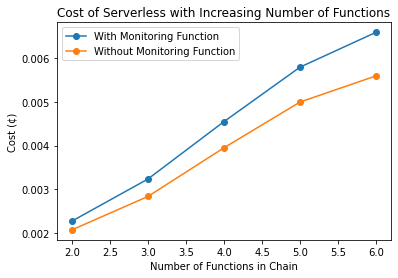

In [4]:
no_mon_billed_time = [99.8,
133.3,
188.9,
239.3,
263.4]
mon_billed_time = [255,
285.9,
355.4,
446.3,
548.6]

LAMBDA_DURTION_COST = 0.0000166667
LAMBDA_REQUEST_COST = 0.20 / 1000000

def cost(duration, time):
    allocated_memory = 0.0009765625 * 1024  # convert MB to GB
    request_compute_time = np.ceil(duration) * 0.001  # convert ms to seconds
    total_compute = allocated_memory * request_compute_time
    compute_charge = LAMBDA_DURTION_COST * total_compute
    return time*LAMBDA_REQUEST_COST + compute_charge

import matplotlib.pyplot as plt
import numpy as np

plt.plot([2,3,4,5,6], [cost(time, 2*i-1)*1000 for i, time in enumerate(no_mon_billed_time, start=2)], marker='o', label='With Monitoring Function')
plt.plot([2,3,4,5,6], [cost(time, i)*1000 for i, time in enumerate(no_mon_billed_time, start=2)], marker='o', label='Without Monitoring Function')
# Label axes
plt.xlabel('Number of Functions in Chain')
plt.ylabel('Cost (¢)')
plt.legend()
plt.title('Cost of Serverless with Increasing Number of Functions')

# # Show plot
plt.savefig('graphs/cost.pdf')

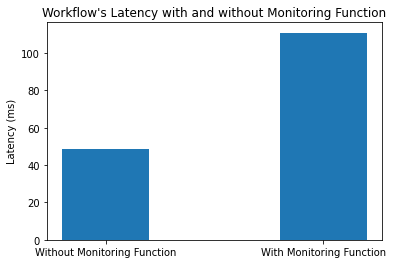

In [5]:
a = 48.375
b = 110.875

plt.bar([1,1.5], [a,b], width=0.2, align='center')
plt.xticks([1,1.5], ['Without Monitoring Function', 'With Monitoring Function'])
# # Label axes
# plt.xlabel('Number of Functions in Chain')
plt.ylabel('Latency (ms)')
# plt.legend()
plt.title("Workflow's Latency with and without Monitoring Function")

# # Show plot
plt.savefig('graphs/lat-use.pdf')
